In [84]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as pl
from math import *
from PIL import Image
from scipy import misc, ndimage
from scipy.stats import *
import scipy.optimize as opt
from scipy import interpolate

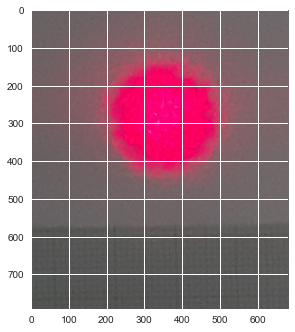

In [85]:
image = Image.open("C:/Users/Sanatan/Desktop/Z1_image.jpg")
width, height = image.size
pl.imshow(image)

I= np.zeros((width,height))

for i in range(width):
    for j in range(height):
        pix = image.getpixel((i,j))
        I[i][j]+=(pix[0])

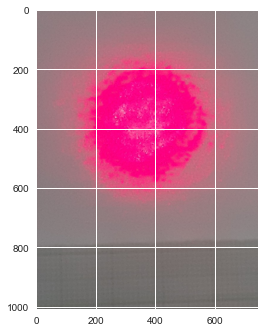

In [86]:
image2 = Image.open("C:/Users/Sanatan/Desktop/Z2_image.jpg")
width2, height2 = image2.size
pl.imshow(image2)

I2= np.zeros((width2,height2))

for i in range(width2):
    for j in range(height2):
        pix = image2.getpixel((i,j))
        I2[i][j]+= (pix[0])

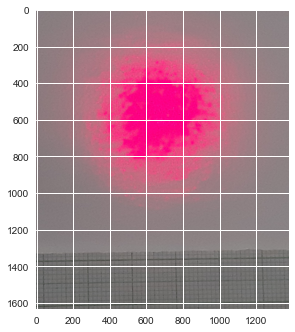

In [87]:
image3 = Image.open("C:/Users/Sanatan/Desktop/Z3_image.jpg")
width3, height3 = image3.size
pl.imshow(image3)

I3= np.zeros((width3,height3))

for i in range(width3):
    for j in range(height3):
        pix = image3.getpixel((i,j))
        I3[i][j]+= (pix[0])

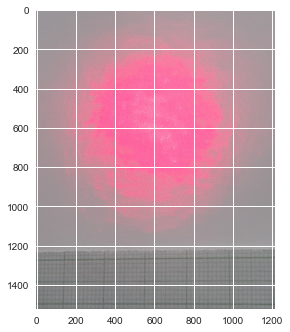

In [88]:
image4 = Image.open("C:/Users/Sanatan/Desktop/Z4_image.jpg")
width4, height4 = image4.size
pl.imshow(image4)

I4= np.zeros((width4,height4))

for i in range(width4):
    for j in range(height4):
        pix = image4.getpixel((i,j))
        I4[i][j]+=(pix[0])

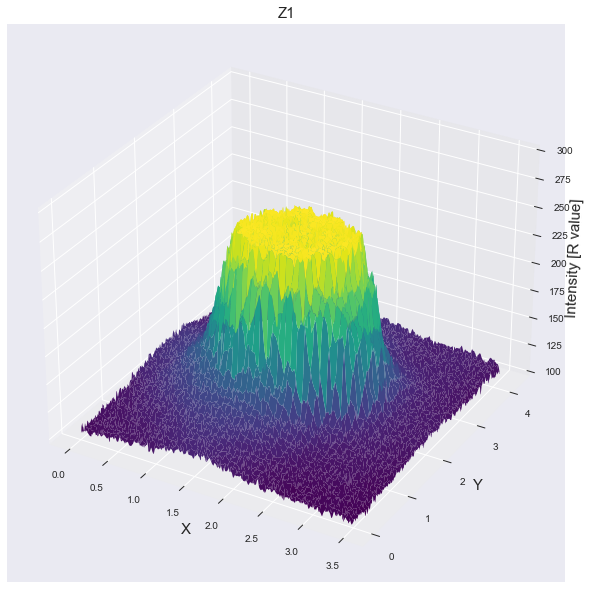

In [95]:
X1 = np.linspace(0,3.5,564)
Y1 = np.linspace(0,4.22,width)


fig = pl.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Z1', fontsize=15) 
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y',fontsize=15) 
ax.set_zlabel('Intensity [R value]',fontsize=15) 
ax.set_zlim(100, 300)

x1, y1 = np.meshgrid(X1,Y1)
I_ = ndimage.uniform_filter(I[:,0:564], 2)

    
ax.plot_surface(x1,y1,I_, cmap='viridis')
pl.show()


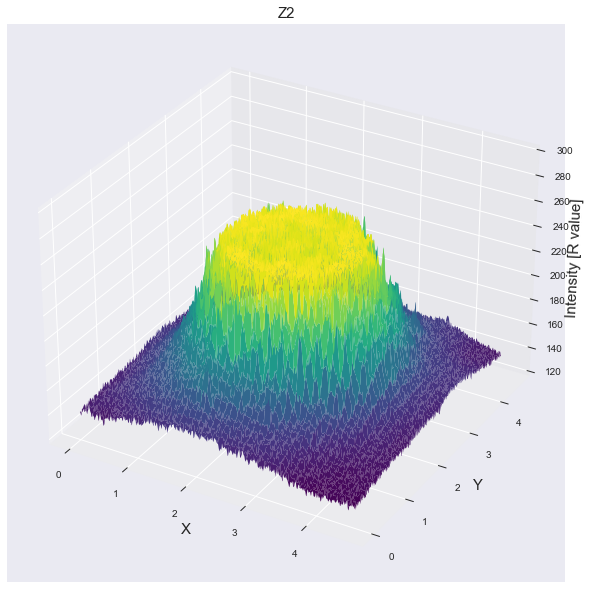

In [96]:
X2 = np.linspace(0,4.6,754)
Y2 = np.linspace(0,4.55,width2)

fig = pl.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Z2', fontsize=15) 
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y',fontsize=15) 
ax.set_zlabel('Intensity [R value]',fontsize=15)
ax.set_zlim(120, 300)

x2, y2 = np.meshgrid(X2,Y2)
I2_ = ndimage.uniform_filter(I2[:,0:754], 2)
    
ax.plot_surface(x2,y2,I2_, cmap='viridis')
pl.show()

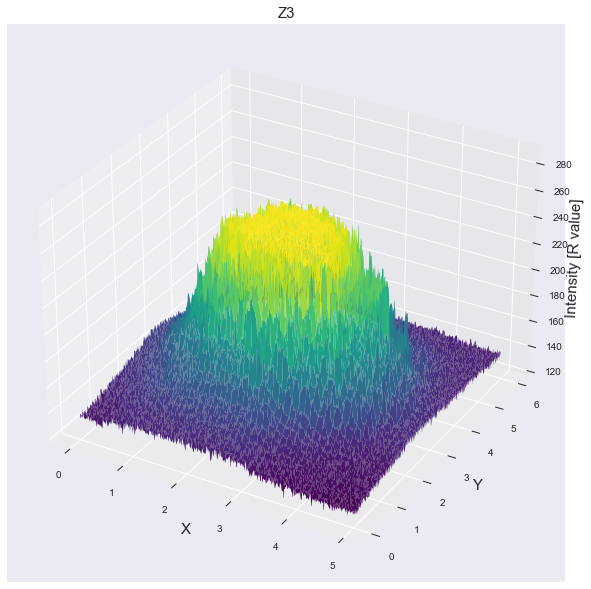

In [97]:
X3 = np.linspace(0,5.003,1156)
Y3 = np.linspace(0,5.94,width3)

fig = pl.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Z3', fontsize=15) 
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y',fontsize=15) 
ax.set_zlabel('Intensity [R value]',fontsize=15) 
ax.set_zlim(120, 290)

x3, y3 = np.meshgrid(X3,Y3)
I3_ = ndimage.uniform_filter(I3[:,0:1156], 2)
    
    
ax.plot_surface(x3,y3,I3_, cmap='viridis')
pl.show()



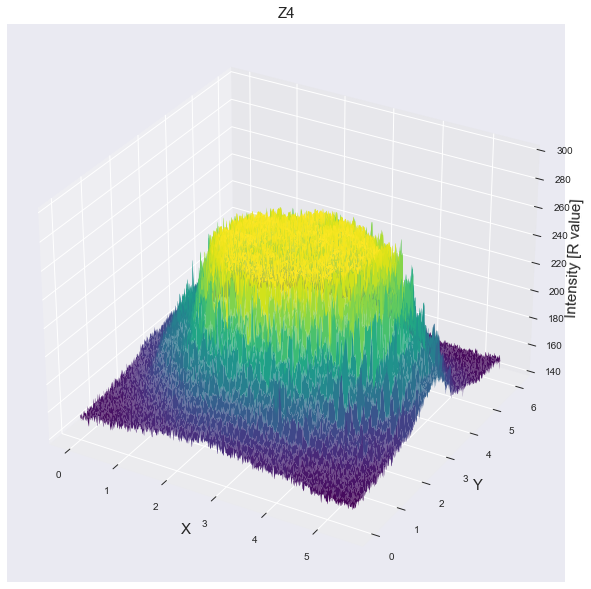

In [98]:
X4 = np.linspace(0,5.5,1106)
Y4 = np.linspace(0,6.06,width4)

fig = pl.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Z4', fontsize=15) 
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y',fontsize=15) 
ax.set_zlabel('Intensity [R value]',fontsize=15) 
ax.set_zlim(140, 300)

x4, y4 = np.meshgrid(X4,Y4)
I4_ = ndimage.uniform_filter(I4[:,0:1106], 2)

ax.plot_surface(x4,y4,I4_, cmap='viridis')
pl.show()


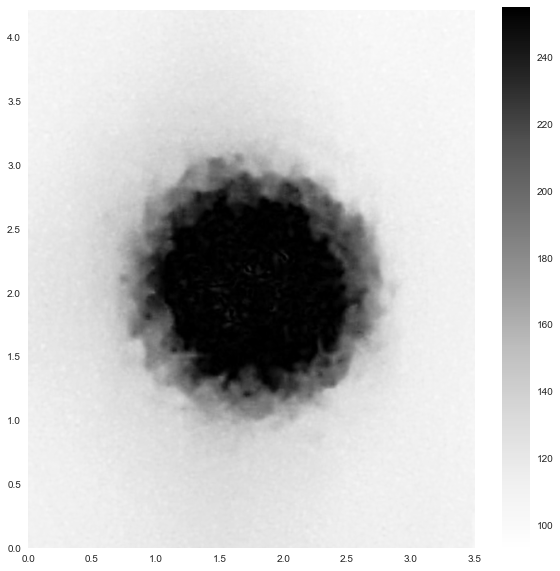

In [99]:
pl.figure(figsize=(10,10))
pl.imshow(I_, extent=[0,3.5,0,4.22])
pl.grid()
pl.colorbar()

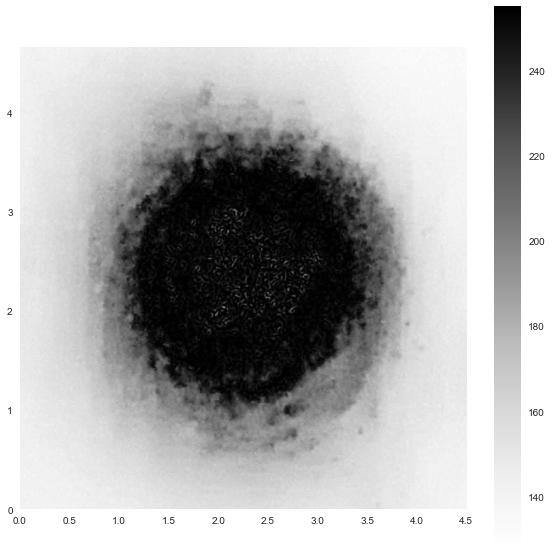

In [100]:
pl.figure(figsize=(10,10))
pl.imshow(I2_, extent=[0,4.5,0,4.66])
pl.grid()
pl.colorbar()

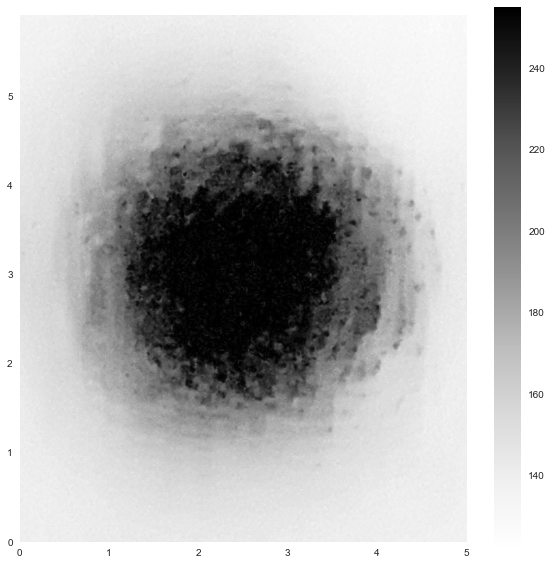

In [101]:
pl.figure(figsize=(10,10))
pl.imshow(I3_, extent=[0,5.003,0,5.9])
pl.grid()
pl.colorbar()

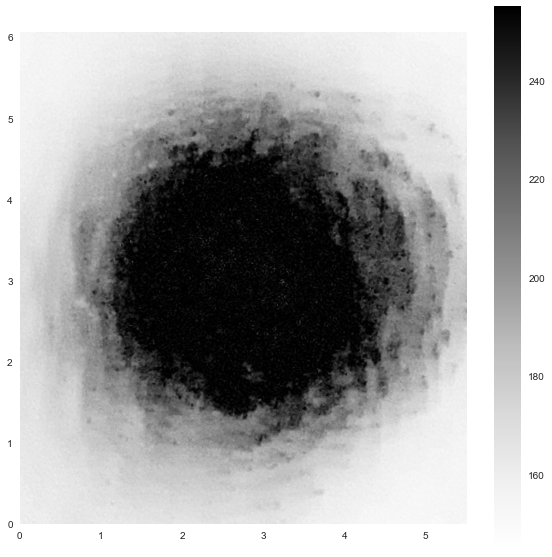

In [102]:
pl.figure(figsize=(10,10))
pl.imshow(I4_, extent=[0,5.5,0,6.06])
pl.grid()
pl.colorbar()

In [103]:
def twoD_Gaussian(mesh, amplitude, x_0, y_0, sigma, offset):
    (x, y) = mesh
    x_0 = float(x_0)
    y_0 = float(y_0)
    g = offset + amplitude*np.exp(-0.5*(((x-x_0)**2) + ((y-y_0)**2))/(sigma**2))
    return g.ravel()

In [ ]:
omegaz = []

In [115]:
initial_guess = (150,3.5/2,4.22/2,1,100)
data = I_.ravel()
popt, pcov = opt.curve_fit(twoD_Gaussian, (x1, y1), data, p0=initial_guess)
print(popt[3]*2)

1.367213818098667


[186.99888779   1.72146375   2.19071955   0.68360691 106.47698158]


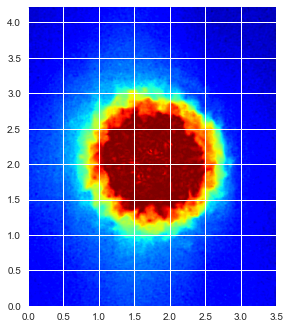

In [105]:
data_fitted = twoD_Gaussian((x1, y1), *popt)
print(popt)
fig, ax = pl.subplots(1, 1)
ax.imshow(data.reshape(682, 564), cmap=pl.cm.jet, extent=[0,3.5,0,4.22])
pl.show()

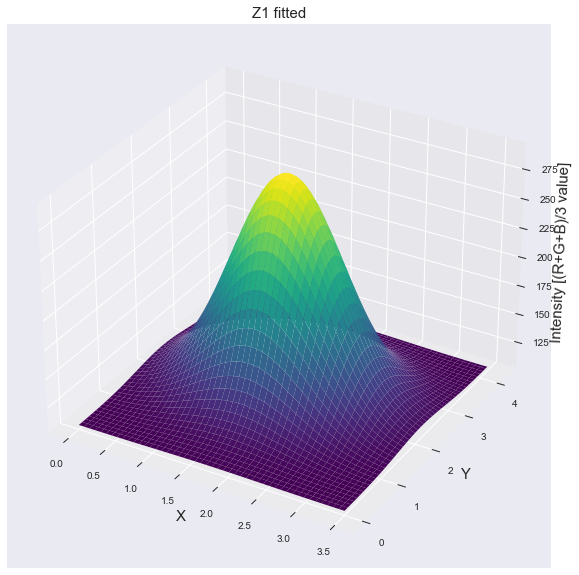

In [106]:
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, y1, data_fitted.reshape(682, 564), cmap="viridis")
ax.set_title('Z1 fitted', fontsize=15) 
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y',fontsize=15) 
ax.set_zlabel('Intensity [(R+G+B)/3 value]',fontsize=15) 
pl.show()

In [116]:
initial_guess = (150,4.6/2,4.55/2,1,100)
data = I2_.ravel()
popt, pcov = opt.curve_fit(twoD_Gaussian, (x2, y2), data, p0=initial_guess)
print(popt[3]*2)

2.534254170206943


[155.8504305    2.29500807   2.2990773    1.26712709 120.62841389]


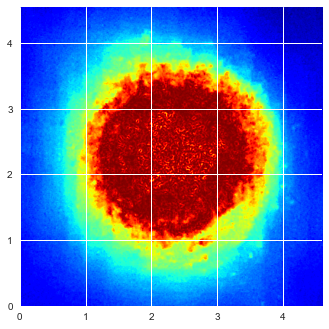

In [108]:
data_fitted = twoD_Gaussian((x2, y2), *popt)
print(popt)
fig, ax = pl.subplots(1, 1)
ax.imshow(data.reshape(747, 754), cmap=pl.cm.jet, extent=[0,4.6,0,4.55])
pl.show()

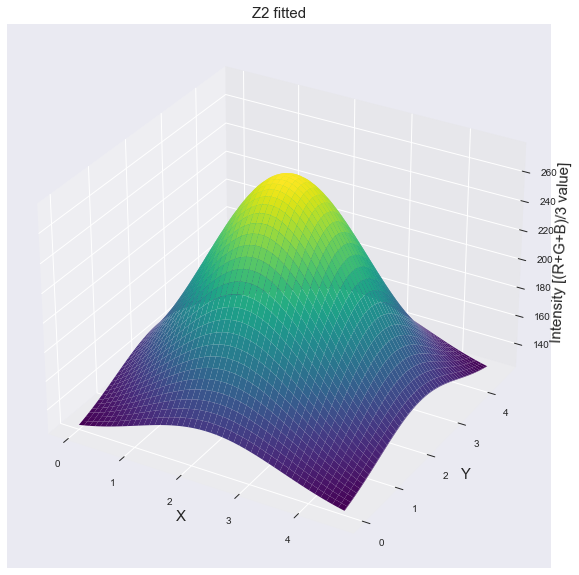

In [109]:
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x2, y2, data_fitted.reshape(747, 754), cmap="viridis")
ax.set_title('Z2 fitted', fontsize=15) 
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y',fontsize=15) 
ax.set_zlabel('Intensity [(R+G+B)/3 value]',fontsize=15) 
pl.show()

In [117]:
initial_guess = (130,5.5/2,6.06/2,1,100)
data = I4_.ravel()
popt, pcov = opt.curve_fit(twoD_Gaussian, (x4, y4), data, p0=initial_guess, maxfev=4000)
print(popt[3]*2)

3.7474511484545983


[148.18811127   2.81013452   3.06649538   1.87372557 125.10111957]


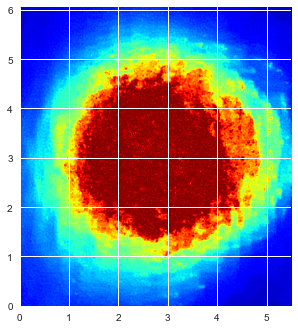

In [111]:
data_fitted = twoD_Gaussian((x4, y4), *popt)
print(popt)
fig, ax = pl.subplots(1, 1)
ax.imshow(data.reshape(1212, 1106), cmap=pl.cm.jet, extent=[0,5.5,0,6.06])
pl.show()

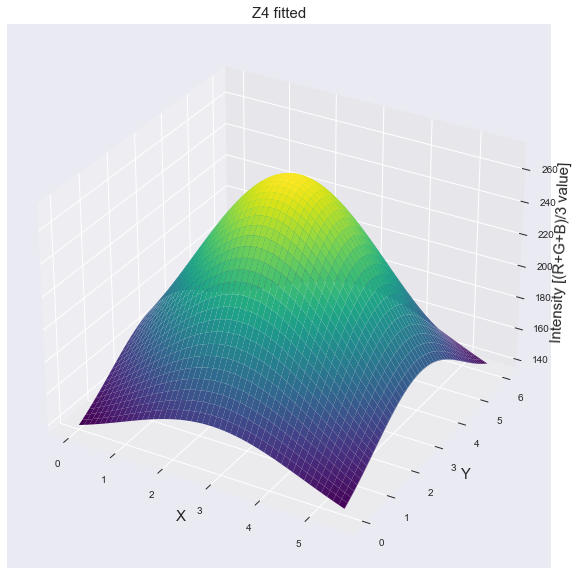

In [112]:
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x4, y4, data_fitted.reshape(1212, 1106), cmap="viridis")
ax.set_title('Z4 fitted', fontsize=15) 
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y',fontsize=15) 
ax.set_zlabel('Intensity [(R+G+B)/3 value]',fontsize=15) 
pl.show()

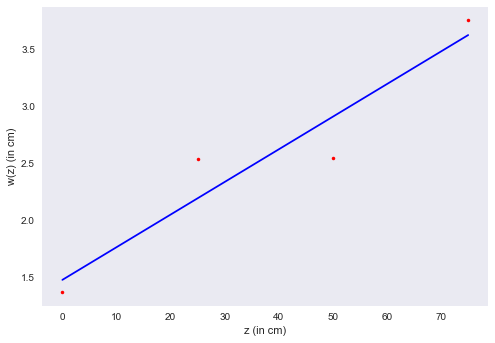

0.057171662566886806


In [120]:
y = [1.367213818098667,2.534254170206943,2.54,3.7474511484545983]
x = [0,25,50,75]
p1 = np.polyfit(x,y,1)
plt.plot(x,y,'r.')
plt.plot(x,np.polyval(p1,x),'b')
plt.xlabel('z (in cm)')
plt.ylabel('w(z) (in cm)')
plt.grid()
plt.show()
print(p1[0]*2)

In [123]:
import math 
l = 632 * 10**(-9)
theta = 0.0285
w = l/(math.pi*theta)
print(w)

7.058661335724762e-06
